In [3]:
import matplotlib.pyplot as plt

from model.pentomino import PieceConfig, RelPositions, Shapes, Colors, Board


def sample_piece(color, shape):
    target = PieceConfig(color, shape, RelPositions.CENTER)
    board = Board(15, 15)  # we need at least size of 3 * 5
    board.add_piece_from_config(target)
    arr = board.to_rgb_array()
    center = arr[5:10, 5:10]
    return center


def sample_train(color, shape):
    filename = f"{shape.value_name}_{color.value_name}.png"
    plt.axis("off")
    plt.imshow(sample_piece(color, shape))
    plt.savefig(f"data/single/train/{filename}", bbox_inches='tight')
    return {"color": color.name, "shape": shape.name, "image": filename}


def sample_test(color, shape):
    filename = f"{shape.value_name}_{color.value_name}.png"
    plt.axis("off")
    plt.imshow(sample_piece(color, shape))
    plt.savefig(f"data/single/test/{filename}", bbox_inches='tight')
    return {"color": color.name, "shape": shape.name, "image": filename}

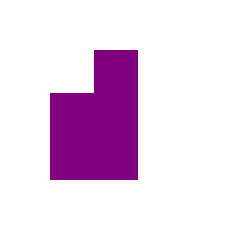

In [5]:
# we choose 4 shapes and 4 colors;
# we have all combinations except for each shape we do not choose a certain color
shapes = [Shapes.F, Shapes.T, Shapes.N, Shapes.P]
colors = [Colors.BLUE, Colors.RED, Colors.GREEN, Colors.PURPLE]
train_samples = []
test_samples = []
id_counter = 0
for shape_idx, shape in enumerate(shapes):
    for color_idx, color in enumerate(colors):
        sample = {"id": id_counter}
        if shape_idx == color_idx:
            test_samples.append({**sample, **sample_train(color, shape)})
        else:
            train_samples.append({**sample, **sample_test(color, shape)})
        id_counter = id_counter + 1

import json

with open("data/single/train.json", "w") as f:
    json.dump(train_samples, f)

with open("data/single/test.json", "w") as f:
    json.dump(test_samples, f)